### Module 3 Learning: Linear Regression as an example of Machine Learning
In this activity, become familiar with the concept of a mathematical model used to predict a value.  This concept will carry us forward to using more sophisticated machine learning models to predict increasingly complex data.<P>
    
We might call this a "statistical" method. We will contrast this to the "machine learning" method in the next activity. <P>

In [1]:
from sklearn import datasets # We'll get a data set from this module
import pandas as pd # Used to store data in a DataFrame
import numpy as np # We will use the np linear model
import matplotlib.pyplot as plt # Visualization module
# This line allows us to plot graphs inside the jupyter notebook
%matplotlib inline 

### Get some data to work with

In [2]:
# Import an example dataset
# From: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
data = datasets.load_linnerud()
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data=data.target, columns=data.target_names)
print('Size of data (Rows,Cols):',df.shape)
df.head(4) # Show just the first 4

Size of data (Rows,Cols): (20, 3)


,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0


In [3]:
# Isolate two columns to which we will fit a model
X = df['Weight'] # We'll call this our independent variable. It is a pandas Series datatype.
y = df['Waist'] # This will be our dependent variable
# Print the first 3 rows of each Series
print('Sample of weight in lbs.\n',X.head(3))
print('Sample of waist in inches.\n',y.head(3))

Sample of weight in lbs.
 0    191.0
1    189.0
2    193.0
Name: Weight, dtype: float64
Sample of waist in inches.
 0    36.0
1    37.0
2    38.0
Name: Waist, dtype: float64


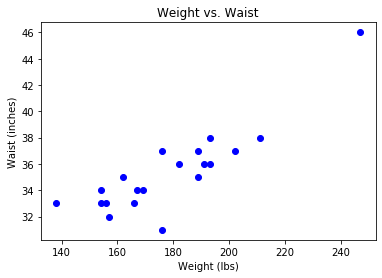

In [4]:
# Plot the data using the matplotlib library
# Scatter plots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(X, y, c ="blue")
plt.title("Weight vs. Waist")
plt.xlabel("Weight (lbs)")
plt.ylabel("Waist (inches)")
plt.show()

In [5]:
# Fit a model to the data
model = np.polyfit(X,y,1) # polyfit() is used to perform a least squares fit using a deg = 1 line.
print('The linear model has equation of:')
print('y = ',model[0],'* x + ',model[1]) # slope/intercept

The linear model has equation of:
y =  0.11285699485443927 * x +  15.243740718997135


In [6]:
# Use the model to predict my waist size
predict = np.poly1d(model) # Creates a prediction model object using the model.
myWeight = 210 # Set my weight
myPredictedWaist = predict(myWeight) # Predict my waist size
myTrueWaist = 36
print("My predicted waist is {} while my actual waist is {} for an error of: {} inches."
      .format(myPredictedWaist, myTrueWaist,myPredictedWaist - 36))

My predicted waist is 38.94370963842938 while my actual waist is 36 for an error of: 2.9437096384293824 inches.


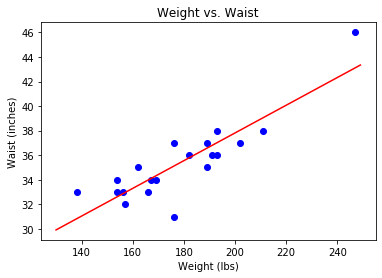

In [7]:
# Let's plot the predicted line
#
# Create a list of integers to on the x-axis
X_pred = range(130,250) # Integers between low and high
# From each of those integers, predict the y-axis value using the linear model prediction
y_pred = predict(X_pred) # Predicted values for each of these
#
# Plot both the original data points and the predicted line
plt.scatter(X,y, c = 'blue') # Original data
plt.plot(X_pred,y_pred, c = 'red') # Predicted linear line
plt.title("Weight vs. Waist")
plt.xlabel("Weight (lbs)")
plt.ylabel("Waist (inches)")
plt.show()

In [8]:
# This isn't a perfect model, right?
# But, how good is it? Let's use a common metric called R^2
# https://en.wikipedia.org/wiki/Coefficient_of_determination
from sklearn.metrics import r2_score # import the coefficient of determination (R^2) from skearn library
# Caculate this metric using the original y and the predicted y
r2_score(y,predict(X))

0.7573237354913916